### Imports

In [1]:
from prepare import prep_telco_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




### Acquire and Prep Telco Data

In [2]:
# code to acquire telco data
df = acquire.new_telco_data()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
train, validate, test = prep_telco_data(df)

Train:(3937, 44)
Test:(1407, 44)
Val: (1688, 44)
Train Telco Data:
(3937, 44)
     customer_id  gender  senior_citizen  partner  dependents  tenure  \
5919  8331-ZXFOE  Female               0        0           0      58   
1915  2790-XUYMV    Male               0        0           1      71   
5054  7107-UBYKY  Female               0        1           1      35   
2355  3373-YZZYM    Male               0        1           1       1   
6279  8883-GRDWQ    Male               1        0           0      20   
...          ...     ...             ...      ...         ...     ...   
394   0581-MDMPW  Female               0        0           0      24   
3763  5299-RULOA  Female               0        1           1      10   
3444  4883-KCPZJ  Female               0        1           1      22   
1002  1452-KIOVK    Male               0        0           1      22   
4192  5919-VCZYM    Male               0        0           0       2   

      phone_service multiple_lines      onlin

In [5]:
column_dtypes = train.dtypes.tolist()
print(column_dtypes)

[dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8')]


In [6]:
column_dtypes = train.dtypes.reset_index()
column_dtypes.columns = ['Column', 'Data Type']
print(column_dtypes)


                                   Column Data Type
0                             customer_id    object
1                                  gender    object
2                          senior_citizen     int64
3                                 partner     int64
4                              dependents     int64
5                                  tenure     int64
6                           phone_service     int64
7                          multiple_lines    object
8                         online_security    object
9                           online_backup    object
10                      device_protection    object
11                           tech_support    object
12                           streaming_tv    object
13                       streaming_movies    object
14                      paperless_billing     int64
15                        monthly_charges   float64
16                          total_charges   float64
17                                  churn     int64
18          

#### Churning vs Not Churning

In [7]:
#this gets the number of churn vs no churn
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

### Preview of Train Data

In [8]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


In [9]:
train.has_churned

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    1
3444    0
1002    0
4192    0
Name: has_churned, Length: 3937, dtype: int64

In [10]:
train.churn.unique()

array([0, 1])

In [11]:
train.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,has_churned,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,0.485141,0.302769,32.775210,0.905258,0.590297,64.805131,2316.775641,0.265685,0.265685,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,0.499843,0.459514,24.709604,0.292896,0.491841,30.294804,2284.984394,0.441753,0.441753,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,34.700000,396.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,70.250000,1414.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Explore

In [12]:
train.nunique()

customer_id                              3937
gender                                      2
senior_citizen                              2
partner                                     2
dependents                                  2
tenure                                     72
phone_service                               2
multiple_lines                              3
online_security                             3
online_backup                               3
device_protection                           3
tech_support                                3
streaming_tv                                3
streaming_movies                            3
paperless_billing                           2
monthly_charges                          1331
total_charges                            3748
churn                                       2
contract_type                               3
internet_service_type                       3
payment_type                                4
has_churned                       

In [13]:
train.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                    int64
dependents                                 int64
tenure                                     int64
phone_service                              int64
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                          int64
monthly_charges                          float64
total_charges                            float64
churn                                      int64
contract_type                             object
internet_service_type                     object
payment_type        

In [14]:
columns = train.select_dtypes(include='number')

range_of_columns = columns.max() - columns.min()
range_of_columns

senior_citizen                              1.00
partner                                     1.00
dependents                                  1.00
tenure                                     71.00
phone_service                               1.00
paperless_billing                           1.00
monthly_charges                           100.40
total_charges                            8575.55
churn                                       1.00
has_churned                                 1.00
gender_female                               1.00
multiple_lines_No phone service             1.00
multiple_lines_Yes                          1.00
online_security_No internet service         1.00
online_security_Yes                         1.00
online_backup_No internet service           1.00
online_backup_Yes                           1.00
device_protection_No internet service       1.00
device_protection_Yes                       1.00
tech_support_No internet service            1.00
tech_support_Yes    

In [15]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'has_churned', 'gender_female',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet

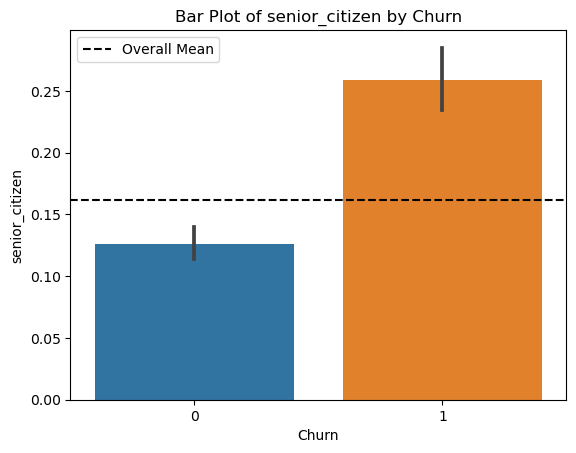

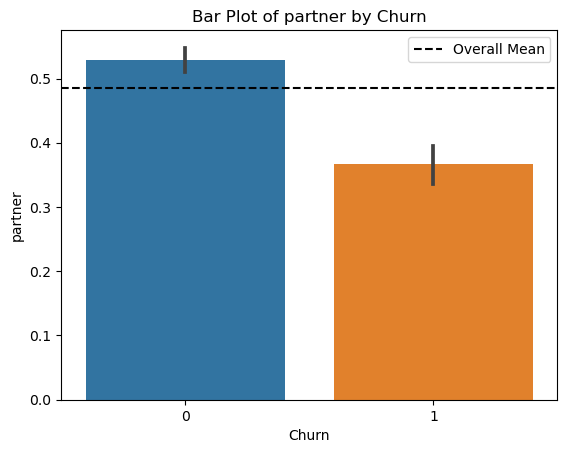

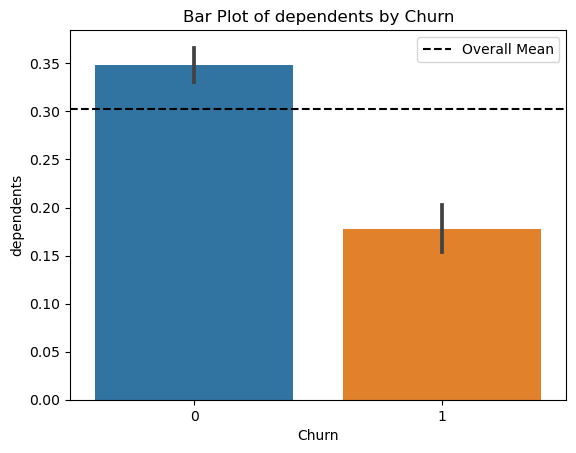

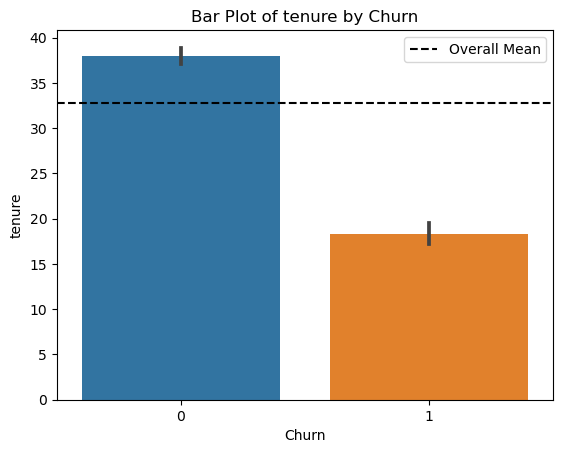

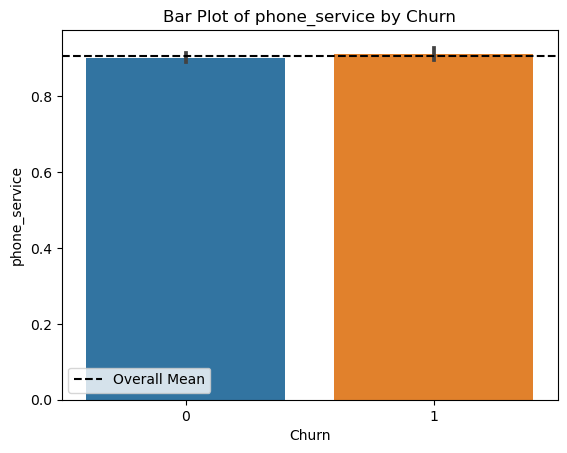

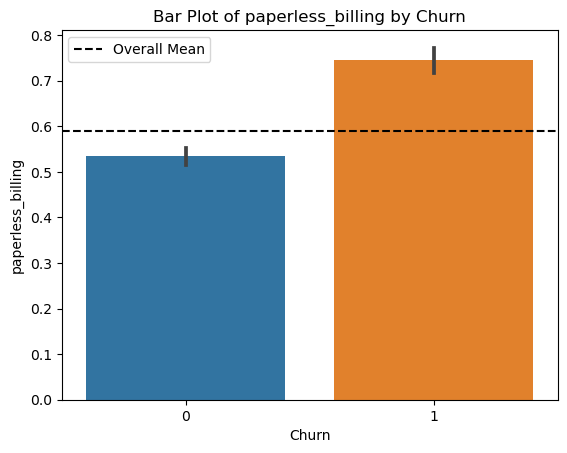

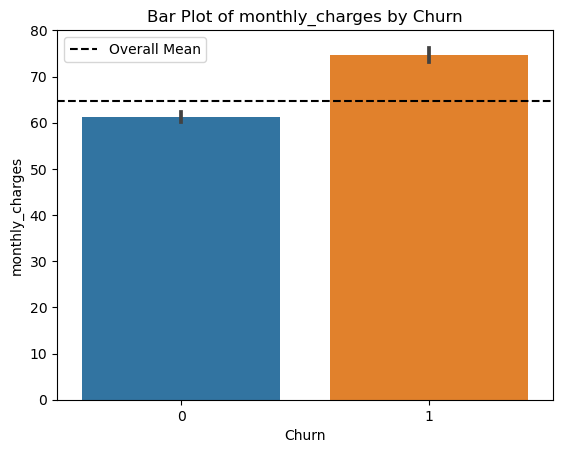

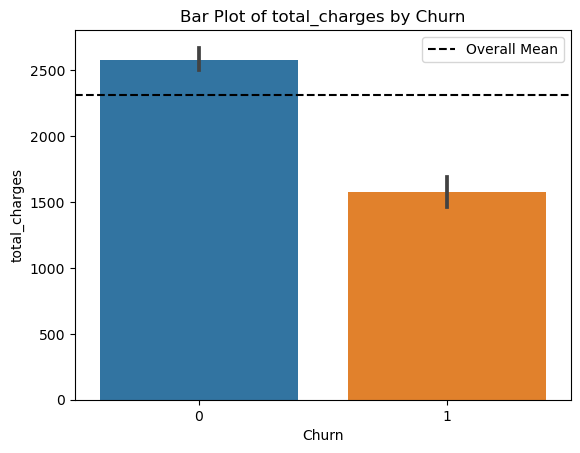

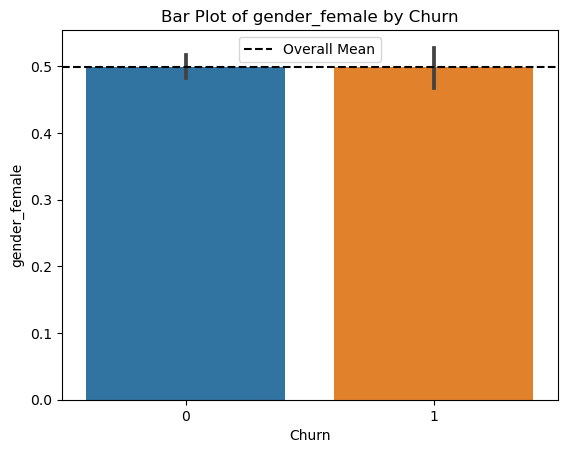

In [16]:
for column in train.columns:
    
    if train[column].dtype in ['int64', 'float64'] and column != 'churn' and column != 'has_churned':
        
        plt.figure()
        sns.barplot(x='churn', y=column, data=train)
        plt.title(f'Bar Plot of {column} by Churn')
        plt.xlabel('Churn')
        plt.ylabel(column)

        overall_mean = train[column].mean()
        plt.axhline(overall_mean, color='black', linestyle='--', label='Overall Mean')
        plt.legend()

        plt.show()

In [17]:
for column in train.columns:

    statistics = train[column].describe()
    print(f'Descriptive Statistics of {column}:\n{statistics}\n')

Descriptive Statistics of customer_id:
count           3937
unique          3937
top       8331-ZXFOE
freq               1
Name: customer_id, dtype: object

Descriptive Statistics of gender:
count     3937
unique       2
top       Male
freq      1976
Name: gender, dtype: object

Descriptive Statistics of senior_citizen:
count    3937.000000
mean        0.161290
std         0.367845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64

Descriptive Statistics of partner:
count    3937.000000
mean        0.485141
std         0.499843
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Descriptive Statistics of dependents:
count    3937.000000
mean        0.302769
std         0.459514
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents, dtype: float64

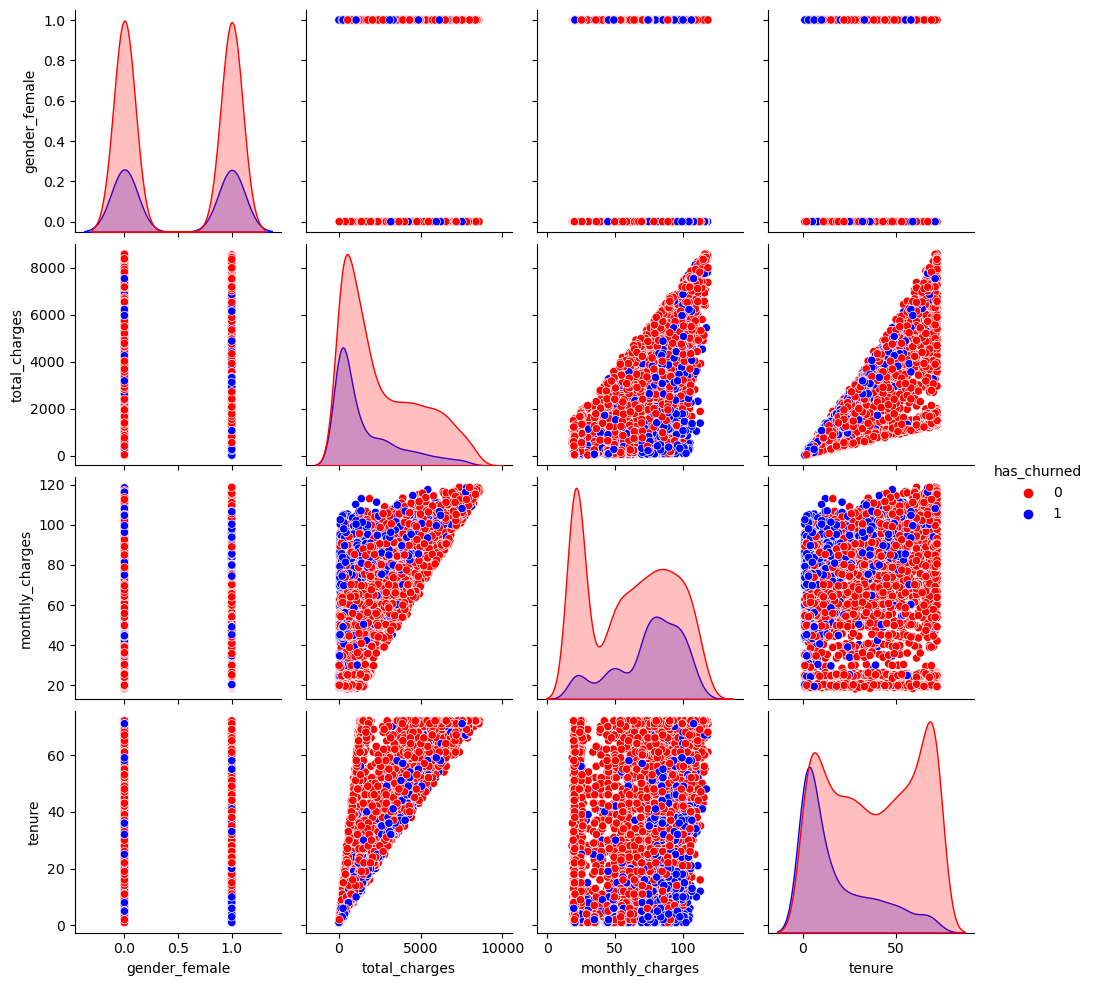

In [18]:
train['churn'] = train['has_churned'].map({0: 'No', 1: 'Yes'})
measurements = ['gender_female', 'total_charges', 'monthly_charges', 'tenure']

sns.pairplot(data=train, vars=measurements, hue='has_churned', palette={0: 'red', 1: 'blue'})
plt.show()


#### If you spend more monthly are you more likely to churn

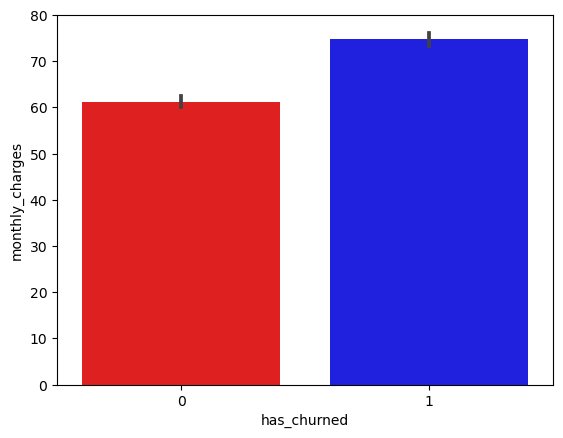

In [19]:
sns.barplot(data=train, x='has_churned', y = 'monthly_charges', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0: monthly charges is independent of churn
Ha: monthly charges is dependent of churn
```

In [20]:
alpha = 0.05

In [21]:
train.has_churned.value_counts()

0    2891
1    1046
Name: has_churned, dtype: int64

In [22]:
contingency_table = pd.crosstab(train['monthly_charges'], train['has_churned'])


In [23]:
chi2, p_val, dof, expected = chi2_contingency(contingency_table)


In [24]:
p_val

1.7696616579595114e-06

In [25]:
p_val < alpha

True

We can reject the null hypothesis

in conclusion: monthly charges is dependent of churn

#### Does the total charges affect whether or not a customer churns

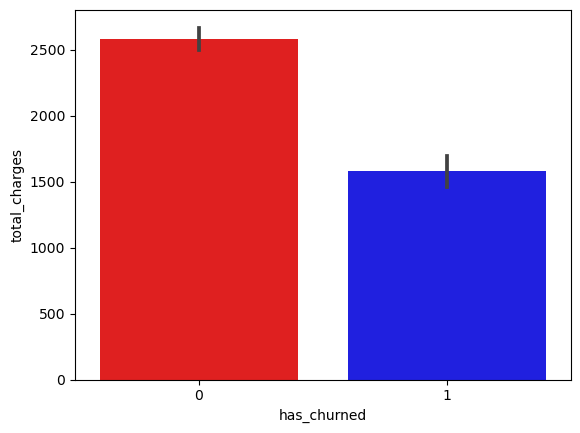

In [26]:
sns.barplot(data=train, x='has_churned', y = 'total_charges', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0: total charges is independent of churn
Ha: total charges is dependent of churn
```

In [27]:
alpha = 0.05

In [28]:
contingency_table = pd.crosstab(train['total_charges'], train['has_churned'])

In [29]:
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

In [30]:
p_val

0.605256775425442

In [31]:
p_val < alpha

False

We fail to reject the null hypothesis

in conclusion: total charges is independent of churn

#### Do males churn more than females?

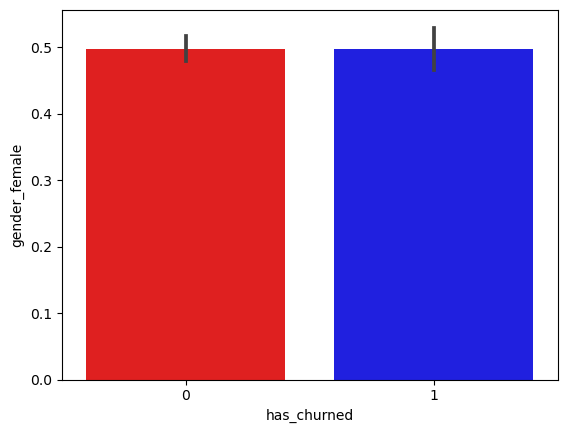

In [32]:
sns.barplot(data=train, x='has_churned', y = 'gender_female', palette={0: 'red', 1: 'blue'})
plt.show()

In [33]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


```
H0: gender is independent of churn
Ha: gender is dependent of churn
```

In [34]:
alpha = 0.05

In [35]:
contingency_table = pd.crosstab(train['gender_female'], train['has_churned'])
contingency_table

has_churned,0,1
gender_female,,
0,1451,525
1,1440,521


<Axes: xlabel='has_churned', ylabel='gender_female'>

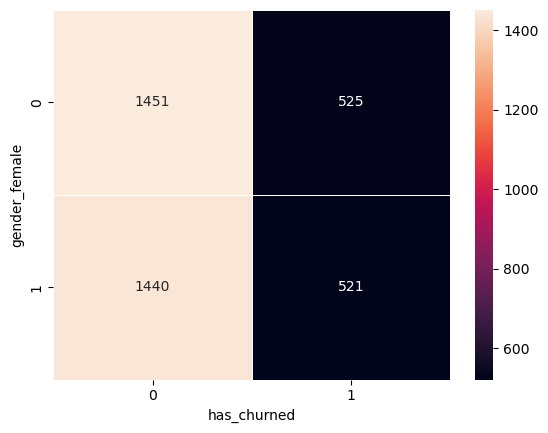

In [36]:
sns.heatmap(contingency_table, annot = True, fmt ='d', linewidths = .5)

In [37]:
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

In [38]:
p_val

1.0

In [39]:
p_val < alpha

False

We fail to reject the null hypothesis

in conclusion: gender is independent of churn

#### Does how long you've been a customer have significance for whether you churn or not

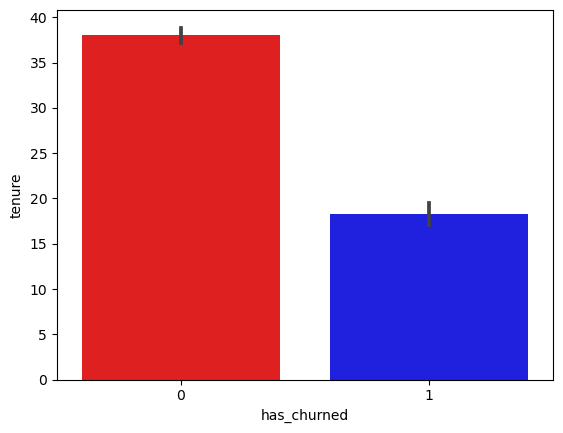

In [40]:
sns.barplot(data=train, x='has_churned', y = 'tenure', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0: tenure is independent of churn
Ha: tenure is dependent of churn
```

In [41]:
alpha = 0.05

In [42]:
contingency_table = pd.crosstab(train['tenure'], train['has_churned'])

In [43]:
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

In [44]:
p_val

6.794556914124504e-90

In [45]:
p_val < alpha

True

We can successfully reject the null hypothesis

in conclusion: tenure is dependent of churn

### Modeling

### KNN

In [46]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'has_churned', 'gender_female',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet

In [47]:
X_train = train.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','total_charges','gender_female'])
      
y_train = train.has_churned

X_validate = validate.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','total_charges','gender_female'])
y_validate = validate.has_churned

X_test = test.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','total_charges','gender_female'])
y_test = test.has_churned

In [48]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn

KNeighborsClassifier(n_neighbors=1)

##### fit it

In [49]:
knn.fit(X_train, y_train)  


KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred = knn.predict(X_train)

In [51]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [52]:
y_pred_proba = knn.predict_proba(X_train)

In [53]:
y_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### baseline

In [54]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

In [55]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.7343154686309372

##### baseline accuracy is 73%

##### accuracy

In [56]:
print('Accuracy of KNN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.98


In [57]:
print('Accuracy of KNN classifier on val set: {:.2f}'
      .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on val set: 0.71


##### model beats baseline

##### confusion matrix

In [58]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[2850,   41],
       [  37, 1009]])

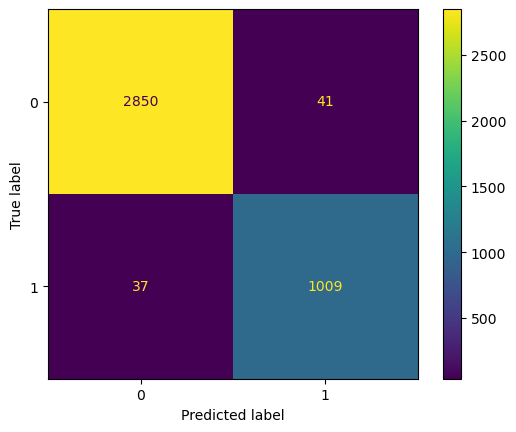

In [59]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)

##### classification report

In [60]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2891
           1       0.96      0.96      0.96      1046

    accuracy                           0.98      3937
   macro avg       0.97      0.98      0.97      3937
weighted avg       0.98      0.98      0.98      3937



In [61]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

accuracy = (tp + tn) / (tn + fp + fn + tp)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

support_pos = tp + fn
support_neg = fp + tn

evaluation_metrics = {
    'metric': [
        'accuracy',
        'true_positive_rate',
        'false_positive_rate',
        'true_negative_rate',
        'false_negative_rate',
        'precision',
        'recall',
        'f1_score',
        'support_pos',
        'support_neg'
    ],
    'score': [
        accuracy,
        true_positive_rate,
        false_positive_rate,
        true_negative_rate,
        false_negative_rate,
        precision,
        recall,
        f1_score,
        support_pos,
        support_neg
    ]
}

metrics_df = pd.DataFrame(evaluation_metrics)


In [62]:
metrics_df

,metric,score
0,accuracy,0.980188
1,true_positive_rate,0.964627
2,false_positive_rate,0.014182
3,true_negative_rate,0.985818
4,false_negative_rate,0.035373
5,precision,0.960952
6,recall,0.964627
7,f1_score,0.962786
8,support_pos,1046.000000
9,support_neg,2891.000000


##### best models

In [63]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    model_set.append(knn)
    model_accuracies.append({
        'neighbors': i,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2)
        
    })


In [64]:
best_models = pd.DataFrame(model_accuracies)

In [65]:
best_models.sort_values(by = 'score_diff', ascending = True)

,neighbors,train_score,validate_score,score_diff
19,20,0.80,0.77,0.03
17,18,0.80,0.77,0.03
16,17,0.81,0.77,0.03
18,19,0.80,0.77,0.03
15,16,0.81,0.77,0.04
14,15,0.81,0.77,0.04
13,14,0.81,0.77,0.04
12,13,0.81,0.77,0.04
11,12,0.81,0.77,0.05
10,11,0.81,0.77,0.05


##### Model where k = 9 would be the best model to use with train score of 0.82, validation score of 0.78 and a scored difference of 0.04.

In [66]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn

KNeighborsClassifier(n_neighbors=9)

In [67]:
knn.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=9)

In [68]:
model_set = []
model_accuracy = []    
    
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
model_set.append(knn)
model_accuracy.append({
        'neighbors': i,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2),
       
        
    })


In [69]:
pd.DataFrame(model_accuracy)

,neighbors,train_score,validate_score,score_diff
0,20,0.81,0.76,0.05


### RandomForest

In [70]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)


#### fit it

In [71]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=123)

##### feature importances

In [72]:
print(rf.feature_importances_)

[0.42887992 0.57112008]


##### predict and prob

In [73]:
y_pred = rf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 0, 0])

In [74]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.95561646, 0.04438354],
       [0.99238411, 0.00761589],
       [0.98360036, 0.01639964],
       [0.96307146, 0.03692854],
       [0.93319186, 0.06680814]])

In [75]:
X_test

,tenure,monthly_charges
3311,29,20.00
6330,36,25.10
6156,1,44.00
5313,25,69.75
1176,34,50.20
...,...,...
600,54,103.95
3946,10,24.80
3230,57,39.30
349,24,20.30


##### confusion matrix

In [76]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[2779,  112],
       [ 399,  647]])

##### classification report

In [77]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2891
           1       0.85      0.62      0.72      1046

    accuracy                           0.87      3937
   macro avg       0.86      0.79      0.82      3937
weighted avg       0.87      0.87      0.86      3937



##### visual

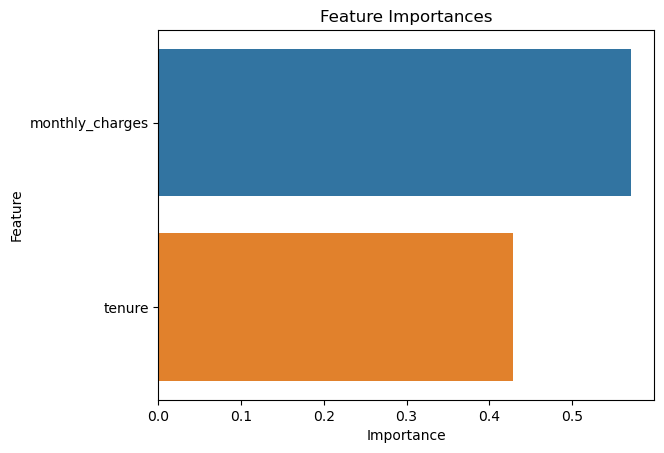

In [78]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances })

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot( y=feature_importances['Feature'], x=feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')


plt.title('Feature Importances')
plt.show()

In [79]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.870206
1,true_positive_rate,0.618547
2,false_positive_rate,0.038741
3,true_negative_rate,0.961259
4,false_negative_rate,0.381453
5,precision,0.852437
6,recall,0.618547
7,f1_score,0.716898
8,support_pos,1046.000000
9,support_neg,2891.000000


##### accuracy

In [80]:
print('Accuracy of Random Tree classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))

Accuracy of Random Tree classifier on training set: 0.87


##### higher than baseline

#### model scores

In [81]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    train_score = round(rf.score(X_train, y_train), 2)
    validate_score = round(rf.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score

    
    model_set.append(rf)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference
        
        
    })

In [82]:
best_models2 = pd.DataFrame(model_accuracies)
best_models2.sort_values(by = 'score_diff', ascending = True)

,max_depth,train_score,validate_score,score_diff
0,1,0.73,0.73,0.00
2,3,0.79,0.78,0.01
1,2,0.79,0.77,0.02
3,4,0.80,0.78,0.02
4,5,0.80,0.78,0.02
5,6,0.81,0.78,0.03
6,7,0.82,0.78,0.04
7,8,0.83,0.77,0.06
8,9,0.85,0.77,0.08
9,10,0.87,0.77,0.10


##### Best model for RF is where max_depth = 3 with a train score of 0.79, a validation score of 0.78 and a score difference of 0.01

In [83]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [85]:
model_set = []
model_accuracy = [] 
    
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
train_score = round(rf.score(X_train, y_train), 2)
validate_score = round(rf.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score


model_set.append(rf)
model_accuracy.append({
        'max_depth': 3,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference,
        
        
 })




In [86]:
pd.DataFrame(model_accuracy)

,max_depth,train_score,validate_score,score_diff
0,3,0.79,0.78,0.01


### LogisticRegression

In [87]:
logit = LogisticRegression(C=1, random_state=123)


##### fit it

In [88]:
logit.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

##### feature importance

In [89]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.05530036  0.03396496]]
Intercept: 
 [-1.84000944]


##### predict and prob

In [90]:
y_pred = logit.predict(X_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [91]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[:5]

array([[0.93292552, 0.06707448],
       [0.94603936, 0.05396064],
       [0.94789211, 0.05210789],
       [0.77611751, 0.22388249],
       [0.75248482, 0.24751518]])

##### baseline

In [92]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

In [93]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)


0.7343154686309372

##### accuracy

In [94]:
print('Accuracy of Logistic Regression classifier 1 on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier 1 on training set: 0.78


##### model beats baseline

In [95]:
print('Accuracy of Logistic Regression classifier 1 on validation set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier 1 on validation set: 0.77


##### confusion matrix

In [96]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[2627,  264],
       [ 585,  461]])

##### classification report

In [97]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2891
           1       0.64      0.44      0.52      1046

    accuracy                           0.78      3937
   macro avg       0.73      0.67      0.69      3937
weighted avg       0.77      0.78      0.77      3937



##### visual

In [98]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

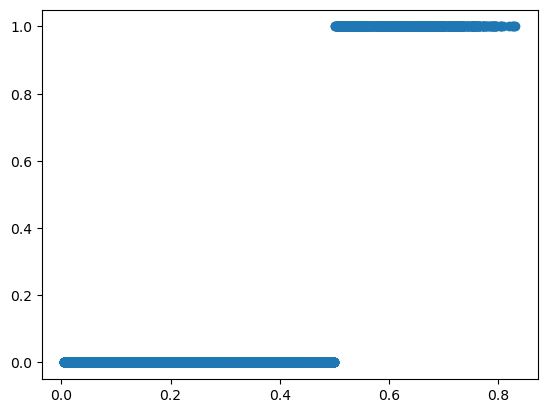

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_pred_proba, y_pred)

In [100]:
model_set = []
model_accuracy = []


logi = LogisticRegression(C=1)
logit.fit(X_train, y_train)
train_score = round(logit.score(X_train, y_train), 2)
validate_score = round(logit.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score



model_set.append(logi)
model_accuracy.append({
    'C': 1,
    'train_score': train_score,
    'validate_score': validate_score,
    'score_diff': score_difference,
    


    

})


In [101]:
model_accuracydf = pd.DataFrame(model_accuracy)
model_accuracydf

,C,train_score,validate_score,score_diff
0,1,0.78,0.77,0.01


###### In Summary:
#### KNN model had a train accuracy of 81% which was 8% over baseline, a validation score of 76%
#### RandomForest model had a train accuracy of 79% which was 6% over baseline, a validation score of 78%
#### Logistic Regression model had a train accuracy of 78% which was 5% over baseline, a validation score of 77%




#### Based on the information provided, it seems that the KNN model has the highest train accuracy of 81%, which is 8% over the baseline. However, the validation score of 76% suggests that the model may not generalize well to unseen data.
#### 
#### On the other hand, the RandomForest model has a slightly lower train accuracy of 79%, which is 6% over the baseline. However, it has a higher validation score of 78%, indicating better generalization performance.
#### 
#### The Logistic Regression model has a train accuracy of 78%, which is 5% over the baseline, and a validation score of 77%. It falls between the KNN and RandomForest models in terms of performance.
#### 
#### Considering both the train accuracy and validation score, the RandomForest model appears to be the best choice as it shows relatively good performance on both the training and validation sets. 

In [102]:
model_set = []
model_accuracy = [] 
    
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
train_score = round(rf.score(X_train, y_train), 2)
validate_score = round(rf.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score
test_score = test_score = round(knn.score(X_test, y_test), 2)


model_set.append(rf)
model_accuracy.append({
        'max_depth': 3,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference,
        'Test_Score' : test_score
        
        
 })



In [103]:
test = pd.DataFrame(model_accuracy)

In [104]:
test

,max_depth,train_score,validate_score,score_diff,Test_Score
0,3,0.79,0.78,0.01,0.78


### RF test score came out to 78%

### Predictions CSV

In [124]:
df = acquire.new_telco_data()

In [125]:
train, validate, test = prep_telco_data(df)

Train:(3937, 44)
Test:(1407, 44)
Val: (1688, 44)
Train Telco Data:
(3937, 44)
     customer_id  gender  senior_citizen  partner  dependents  tenure  \
5919  8331-ZXFOE  Female               0        0           0      58   
1915  2790-XUYMV    Male               0        0           1      71   
5054  7107-UBYKY  Female               0        1           1      35   
2355  3373-YZZYM    Male               0        1           1       1   
6279  8883-GRDWQ    Male               1        0           0      20   
...          ...     ...             ...      ...         ...     ...   
394   0581-MDMPW  Female               0        0           0      24   
3763  5299-RULOA  Female               0        1           1      10   
3444  4883-KCPZJ  Female               0        1           1      22   
1002  1452-KIOVK    Male               0        0           1      22   
4192  5919-VCZYM    Male               0        0           0       2   

      phone_service multiple_lines      onlin

In [126]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [127]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [128]:
train_customer_ids = train['customer_id'].values
test_customer_ids = test['customer_id'].values

y_pred_test = rf.predict(X_test)
y_proba_test = rf.predict_proba(X_test)[:, 1]


predictions = pd.DataFrame({
    'customer_id': test_customer_ids,
    'probability_of_churn': y_proba_test,
    'prediction_of_churn': y_pred_test
})


predictions['prediction_of_churn'] = np.where(predictions['prediction_of_churn'] == 1, 'churn', 'not_churn')


predictions.to_csv('churn_predictions.csv', index=False)
